### Dataset description : This dataset focuses on the Banking, Debt, Financial, Inflation and Systemic Crises that occurred, from 1860 to 2014, in 13 African countries, including: Algeria, Angola, Central African Republic, Ivory Coast, Egypt, Kenya, Mauritius, Morocco, Nigeria, South Africa, Tunisia, Zambia and Zimbabwe. The ML model objective is to predict the likelihood of a Systemic crisis emergence given a set of indicators like the annual inflation rates.¶

In [106]:
# import the necessary libraries
import numpy as np
import pandas as pd

# for visulas
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go

# ggplot style sheet
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [107]:
# Import and read file
df = pd.read_csv(r"C:\Users\josep\OneDrive\Desktop\Datasets\African_crises_dataset.csv")
df.head()

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [108]:
# Check info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_number                   1059 non-null   int64  
 1   country_code                     1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [109]:
# Import pandas profiling library
from ydata_profiling import ProfileReport

# Create a pandas profiling reports to gain insights into the dataset
Profile = ProfileReport(df, title="Pandas Profile Report")
Profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Handle Missing and corrupted values
There are no missing values

In [110]:
# Handling missing data
df.isnull().sum()

country_number                     0
country_code                       0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64

### Remove duplicates, if they exist
No duplicate values found

In [111]:
df.duplicated().sum()

0

In [112]:
# a quick summary statistical analysis
df.describe().astype('int')

,country_number,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
count,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059
mean,35,1967,0,43,0,0,0,20848,0,0,0
std,23,33,0,111,0,0,0,675727,0,0,0
min,1,1860,0,0,0,0,0,-28,0,0,0
25%,15,1951,0,0,0,0,0,2,1,0,0
50%,38,1973,0,0,0,0,0,5,1,0,0
75%,56,1994,0,8,0,0,0,11,1,0,0
max,70,2014,1,744,1,1,0,21989695,1,2,1


#### The mean values for systemic crisis, exchange rates, and domestic debt in default are relatively low, while for GDP-weighted default and annual CPI inflation, the mean values are significantly higher.

#### There were instances of sovereign external debt default, but they were less frequent.

#### The data spans from 1860 to 2014, with systemic crises recorded in some years.

#### There is variation in the data, with some extreme values such as a maximum exchange rate of 744 and a maximum GDP-weighted default of 21,989,695.

In [113]:
# extract the numerical columns from the dataset
num_col = df.select_dtypes(include=['int64', 'float64'])

# confirm if there are negative for each columns
num_col_negative = (num_col < 0).sum()

print(num_col_negative)

country_number                       0
year                                 0
systemic_crisis                      0
exch_usd                             0
domestic_debt_in_default             0
sovereign_external_debt_default      0
gdp_weighted_default                 0
inflation_annual_cpi               131
independence                         0
currency_crises                      0
inflation_crises                     0
dtype: int64


#### In theory, it is possible to have negative inflation_annual_cpi, although it's relatively rare and often associated with specific economic conditions. Negative inflation, also known as deflation, occurs when the general price level of goods and services in an economy decreases over time. 

### Handle outliers, if they exist

country_number                       0
year                                42
systemic_crisis                     82
exch_usd                           214
domestic_debt_in_default            42
sovereign_external_debt_default    162
gdp_weighted_default                30
inflation_annual_cpi               108
independence                       237
currency_crises                    136
inflation_crises                   137
dtype: int64


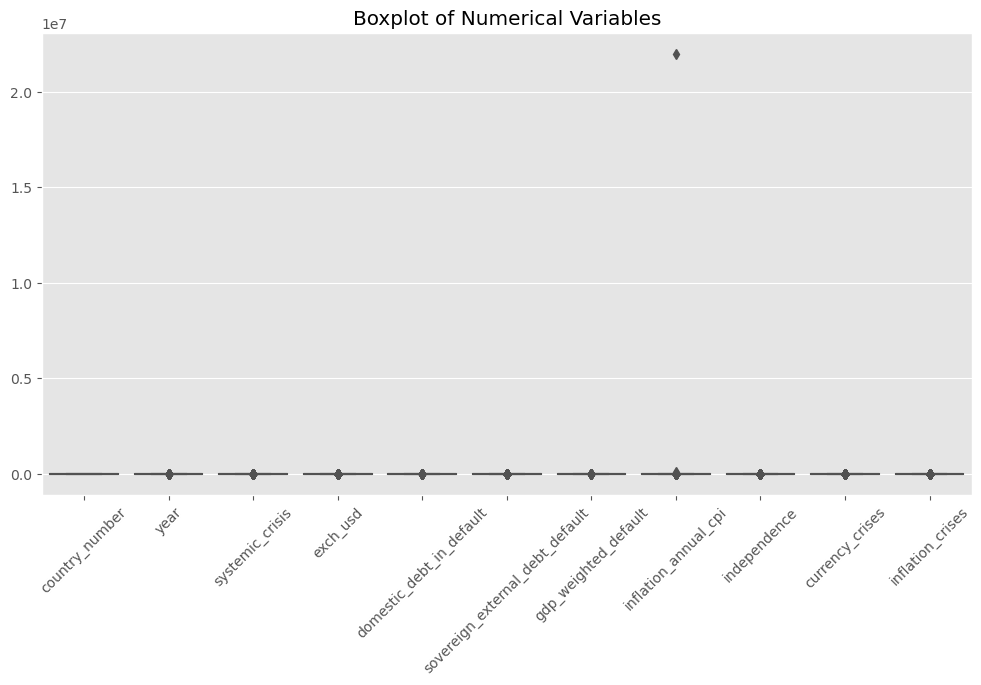

In [114]:
# Extract the numerical columns from the dataset
num_col = df.select_dtypes(include=['int64', 'float64'])

# Calculate the number of outliers for each numerical variable
outliers_count = ((num_col < num_col.quantile(0.25) - 1.5 * (num_col.quantile(0.75) - num_col.quantile(0.25))) |
                  (num_col > num_col.quantile(0.75) + 1.5 * (num_col.quantile(0.75) - num_col.quantile(0.25))))
outliers_count = outliers_count.sum()

# Display the number of outliers in a table
print(outliers_count)

# Create a boxplot to show the distribution of each numerical variable
plt.figure(figsize=(12, 6))
sns.boxplot(data=num_col, palette='coolwarm')
plt.title('Boxplot of Numerical Variables')
plt.xticks(rotation=45)
plt.show()

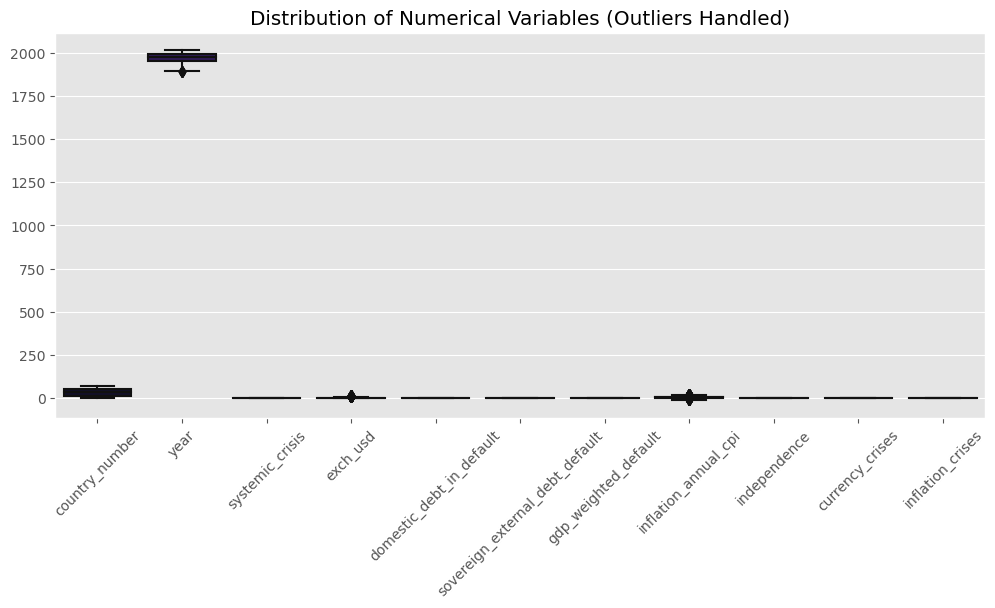

In [115]:
# Calculate the median of each numerical variable
medians = num_col.median()

# Replace outliers with the median of each variable
for column in num_col.columns:
    q1 = num_col[column].quantile(0.25)
    q3 = num_col[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    num_col[column] = num_col[column].apply(lambda x: medians[column] if x < lower_bound or x > upper_bound else x)

# Create a boxplot to show the distribution of each numerical variable after handling outliers
plt.figure(figsize=(12, 5))
sns.boxplot(data=num_col, palette='magma')
plt.title('Distribution of Numerical Variables (Outliers Handled)')
plt.xticks(rotation=45)
plt.show()

##### The outliers in the numerical variables has been removed by replacing it with the median of the columns.

## Data Validation 

In [116]:
# select the numerical variables
print(num_col)

# value counts for numerical variables
for column in num_col:
    print(df[column].value_counts())

      country_number    year  systemic_crisis  exch_usd  \
0                  1  1973.0              0.0  0.052264   
1                  1  1973.0              0.0  0.052798   
2                  1  1973.0              0.0  0.052274   
3                  1  1973.0              0.0  0.051680   
4                  1  1973.0              0.0  0.051308   
...              ...     ...              ...       ...   
1054              70  2009.0              0.0  0.868400   
1055              70  2010.0              0.0  0.868400   
1056              70  2011.0              0.0  0.868400   
1057              70  2012.0              0.0  0.868400   
1058              70  2013.0              0.0  0.868400   

      domestic_debt_in_default  sovereign_external_debt_default  \
0                          0.0                              0.0   
1                          0.0                              0.0   
2                          0.0                              0.0   
3                      

In [117]:
# select the categorical variables
cat_col = df.select_dtypes(include=['category', 'object'])
print(cat_col)

# value counts for categorical variables
for column in cat_col:
    print(df[column].value_counts())

     country_code   country banking_crisis
0             DZA   Algeria         crisis
1             DZA   Algeria      no_crisis
2             DZA   Algeria      no_crisis
3             DZA   Algeria      no_crisis
4             DZA   Algeria      no_crisis
...           ...       ...            ...
1054          ZWE  Zimbabwe         crisis
1055          ZWE  Zimbabwe      no_crisis
1056          ZWE  Zimbabwe      no_crisis
1057          ZWE  Zimbabwe      no_crisis
1058          ZWE  Zimbabwe      no_crisis

[1059 rows x 3 columns]
country_code
EGY    155
ZAF    114
ZWE     90
DZA     85
AGO     77
MAR     75
TUN     75
ZMB     72
MUS     68
KEN     67
CIV     63
NGA     60
CAF     58
Name: count, dtype: int64
country
Egypt                       155
South Africa                114
Zimbabwe                     90
Algeria                      85
Angola                       77
Morocco                      75
Tunisia                      75
Zambia                       72
Mauritius    

### Encode Categorical Features

In [118]:
cat_col.columns.to_list()

['country_code', 'country', 'banking_crisis']

In [119]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame
columns_to_encode = ["country_code","country", "banking_crisis"]

# Create a label encoder instance
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# Display the updated DataFrame
print(df.head())

   country_number  country_code  country  year  systemic_crisis  exch_usd  \
0               1             3        0  1870                1  0.052264   
1               1             3        0  1871                0  0.052798   
2               1             3        0  1872                0  0.052274   
3               1             3        0  1873                0  0.051680   
4               1             3        0  1874                0  0.051308   

   domestic_debt_in_default  sovereign_external_debt_default  \
0                         0                                0   
1                         0                                0   
2                         0                                0   
3                         0                                0   
4                         0                                0   

   gdp_weighted_default  inflation_annual_cpi  independence  currency_crises  \
0                   0.0              3.441456             0             

In [120]:
df.columns

Index(['country_number', 'country_code', 'country', 'year', 'systemic_crisis',
       'exch_usd', 'domestic_debt_in_default',
       'sovereign_external_debt_default', 'gdp_weighted_default',
       'inflation_annual_cpi', 'independence', 'currency_crises',
       'inflation_crises', 'banking_crisis'],
      dtype='object')

In [121]:
# Drop columns country_number and country_code

df.drop(columns= ["country_number", "country_code"], inplace=True)
df.head()

,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,0,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,0
1,0,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,1
2,0,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,1
3,0,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,1
4,0,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,1


In [122]:
# write a code for the 'Systemic_crisis' showing different category. 0 = No Crisis, 1 = Crisis
def systemic_crisis_category(x):
    if x == 1:
        return 'Crisis'
    else:
        return 'No Crisis'

df['new_systemic_crisis'] = df['systemic_crisis'].apply(systemic_crisis_category)
df.head()

,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis,new_systemic_crisis
0,0,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,0,Crisis
1,0,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,1,No Crisis
2,0,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,1,No Crisis
3,0,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,1,No Crisis
4,0,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,1,No Crisis


In [123]:
systemic_crisis_dist = df["new_systemic_crisis"].value_counts()
systemic_crisis_dist

new_systemic_crisis
No Crisis    977
Crisis        82
Name: count, dtype: int64

In [124]:
# Checking for missing values
df.isna().sum()

country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
new_systemic_crisis                0
dtype: int64

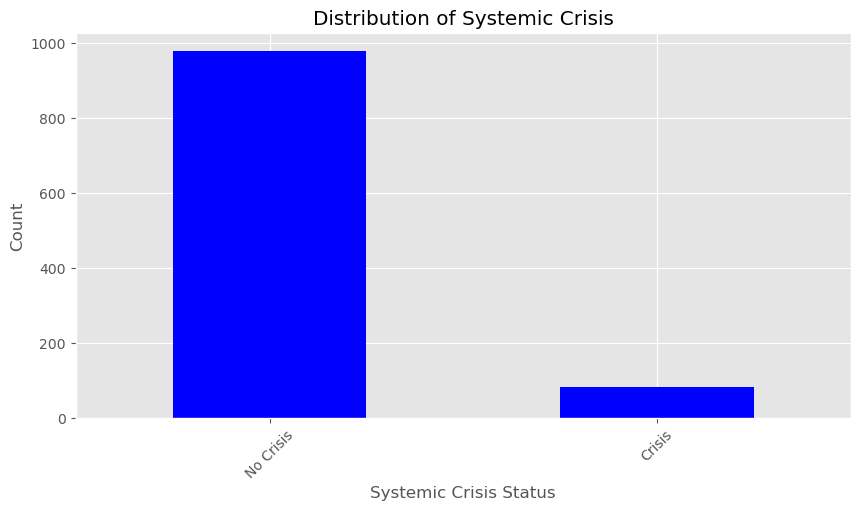

In [136]:
# visualize in a bar chart
systemic_crisis_dist.plot(kind='bar', color='blue', figsize = (10, 5))
plt.xticks(rotation=45)
plt.title('Distribution of Systemic Crisis')
plt.xlabel('Systemic Crisis Status')
plt.ylabel('Count')
plt.show()

##### It was observed that there are more no crisis and very few crisis having a total count of 977 and 82 respectively.

## Feature Selection

In [137]:
# Select the target variable y
y = df['systemic_crisis']

# Drop the target variable and create the independent variables
X = df.drop(columns ='systemic_crisis')

In [138]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: systemic_crisis, dtype: int64

In [139]:
X.head()

,year,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1870,0.052264,0,0,0.0,3.441456,0,0,0,0
1,1871,0.052798,0,0,0.0,14.149140,0,0,0,1
2,1872,0.052274,0,0,0.0,-3.718593,0,0,0,1
3,1873,0.051680,0,0,0.0,11.203897,0,0,0,1
4,1874,0.051308,0,0,0.0,-3.848561,0,0,0,1


In [140]:
# value count of the target y
y.value_counts()

systemic_crisis
0    977
1     82
Name: count, dtype: int64

### Oversampling using SMOTE (Synthetic Minority Over-sampling Technique)
SMOTE is a technique used to balance imbalanced datasets(target), where one class is significantly smaller than the other. It creates synthetic samples by creating new instances that are similar to the minority class. This helps prevent overfitting, which is a problem that can occur when using other techniques like ROS(Random Over Sampling).

In [142]:
pip install -U imbalanced-learn

In [143]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Instantiate SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Resampled the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the class distribution before and after resampling
print('Class distribution before resampling: {}'.format(Counter(y)))
print('Class distribution after resampling: {}'.format(Counter(y_resampled)))

Class distribution before resampling: Counter({0: 977, 1: 82})
Class distribution after resampling: Counter({1: 977, 0: 977})


## Train-Test-Split
Split the dataset into training and testing sets. We will allocate a certain percentage of 80-20 for training and testing, respectively. This will be done using the train_test_split function from scikit-learn.

In [144]:
# Import library
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=30)

print('\n', X_train.head(2))
print('\n', X_test.head(2))
print('\n', y_train.head(2))
print('\n', y_test.head(2))


       year      exch_usd  domestic_debt_in_default  \
152   2005  8.077951e+01                         0   
1011  1966  7.140000e-27                         1   

      sovereign_external_debt_default  gdp_weighted_default  \
152                                 0                   0.0   
1011                                1                   0.0   

      inflation_annual_cpi  independence  currency_crises  inflation_crises  \
152              22.961000             1                1                 1   
1011              3.121953             1                0                 0   

      banking_crisis  
152                1  
1011               1  

      year      exch_usd  domestic_debt_in_default  \
112  1948  2.580000e-08                         0   
107  1943  2.500000e-08                         0   

     sovereign_external_debt_default  gdp_weighted_default  \
112                                0                   0.0   
107                                0                

In [145]:
print(f'The X_train shape: {X_train.shape}')
print(f'The X_test shape: {X_test.shape}')
print(f'The y_train shape: {y_train.shape}')
print(f'The y_test shape: {y_test.shape}')

The X_train shape: (847, 10)
The X_test shape: (212, 10)
The y_train shape: (847,)
The y_test shape: (212,)


### MinMax Scaler

In [146]:
from sklearn.preprocessing import MinMaxScaler
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training features
scaler.fit(X_train)

# Transform the training and test features
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

This method scales the data to a fixed range, usually between 0 and 1. It can be implemented using the MinMaxScaler class from the sklearn.preprocessing module.

### Model Selection

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn import metrics

# for hyperparameter tuning using k-fold cross validation
from sklearn.model_selection import cross_val_score, cross_val_predict

### Model Training

Import the necessary libraries for each algorithms.

#### Logistic Regression

In [148]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_probs = lr_model.predict_proba(X_test_scaled)[:, 1]

In [150]:
# Import library
from sklearn.metrics import accuracy_score

# create predictions
y_pred = lr_model.predict(X_test_scaled)

# print accuracy score for Logistic Regression
print(f'The accuracy of the logistic regression is {accuracy_score(y_pred, y_test).round(3)*100} ' + '%')

The accuracy of the logistic regression is 96.2 %


In [151]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def metrics_calculator(y_true, y_pred, model_name):
    '''
    Calculates and return a dictionary of performance metrics for a binary classification model
    '''
    # Calculate performance metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Create a dictionary of results
    results = {'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}
    return results

lr_result = metrics_calculator(y_test, y_pred, 'lr_model')
lr_result

{'Model': 'lr_model',
 'Accuracy': 0.9622641509433962,
 'Precision': 0.6470588235294118,
 'Recall': 0.8461538461538461,
 'F1-Score': 0.7333333333333334}

#### Decision Tree Classifier

In [162]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [163]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = dc_model.predict(X_test_scaled)

# print accuracy score for DecisionTree Classifier
from sklearn.metrics import accuracy_score
print(f'The accuracy of the decision tree classifier is {accuracy_score(y_pred, y_test).round(3)*100}' + '%')

The accuracy of the decision tree classifier is 98.6%


In [164]:
dt_result = metrics_calculator(y_test, y_pred, 'dt_model')
dt_result

{'Model': 'dt_model',
 'Accuracy': 0.9858490566037735,
 'Precision': 0.8125,
 'Recall': 1.0,
 'F1-Score': 0.896551724137931}

### Support Vector Machine

In [155]:
# Create an instance of Support vector machine
svm_model = SVC(probability=True)

# Fit the model on the scaled training
svm_model.fit(X_train_scaled, y_train)
svm_probs = svm_model.predict_proba(X_test_scaled)[:, 1]

In [156]:
# Predict the classes of the testing data
y_pred = svm_model.predict(X_test_scaled)

# print accuracy score for SVM
print(f'The accuracy of the SVM is {accuracy_score(y_pred, y_test).round(3)*100} ' + '%')

The accuracy of the SVM is 96.7 %


In [157]:
svm_result = metrics_calculator(y_test, y_pred, 'svm_model')
svm_result

{'Model': 'svm_model',
 'Accuracy': 0.9669811320754716,
 'Precision': 0.6666666666666666,
 'Recall': 0.9230769230769231,
 'F1-Score': 0.7741935483870968}

### K-Nearest Neighbour

In [158]:
# Create an instance of K-Nearest Neighbour
knn_model = KNeighborsClassifier()

# Fit the model on the scaled training
knn_model.fit(X_train_scaled, y_train)
knn_probs = knn_model.predict_proba(X_test_scaled)[:, 1]

In [159]:
# Predict the classes of the testing data
y_pred = knn_model.predict(X_test_scaled)

# print accuracy score for K-Nearest Neigbour
print(f'The accuracy of the KNN is {accuracy_score(y_pred, y_test).round(3)*100} ' + '%')

The accuracy of the KNN is 97.2 %


In [160]:
knn_result = metrics_calculator(y_test, y_pred, 'knn_model')
knn_result

{'Model': 'knn_model',
 'Accuracy': 0.9716981132075472,
 'Precision': 0.7333333333333333,
 'Recall': 0.8461538461538461,
 'F1-Score': 0.7857142857142856}

### Model Evaluation
Evaluate the models using classification reports and confusion matrices

Logistic Regression Classification Report:
              precision    recall  f1-score   support

   No Crisis      0.990     0.970     0.980       199
      Crisis      0.647     0.846     0.733        13

    accuracy                          0.962       212
   macro avg      0.818     0.908     0.857       212
weighted avg      0.969     0.962     0.965       212



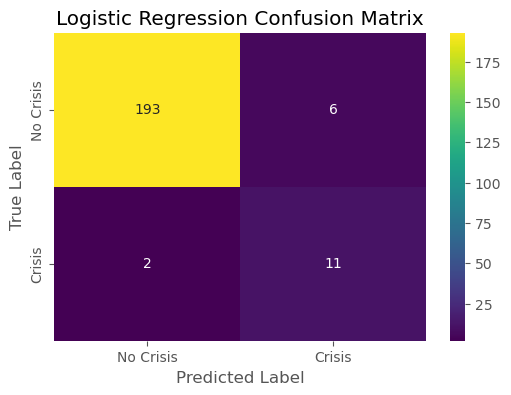

Decision Tree Classification Report:
              precision    recall  f1-score   support

   No Crisis      0.995     0.985     0.990       199
      Crisis      0.800     0.923     0.857        13

    accuracy                          0.981       212
   macro avg      0.897     0.954     0.924       212
weighted avg      0.983     0.981     0.982       212



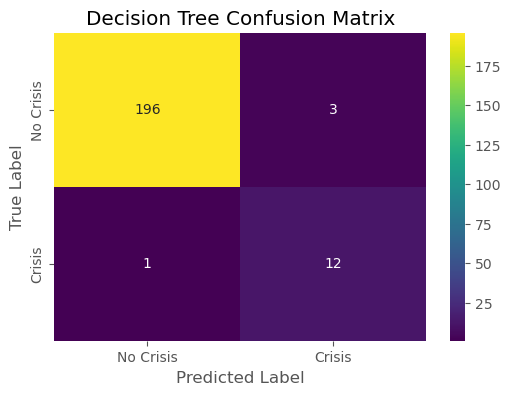

SVM Classification Report:
              precision    recall  f1-score   support

   No Crisis      0.995     0.970     0.982       199
      Crisis      0.667     0.923     0.774        13

    accuracy                          0.967       212
   macro avg      0.831     0.946     0.878       212
weighted avg      0.975     0.967     0.969       212



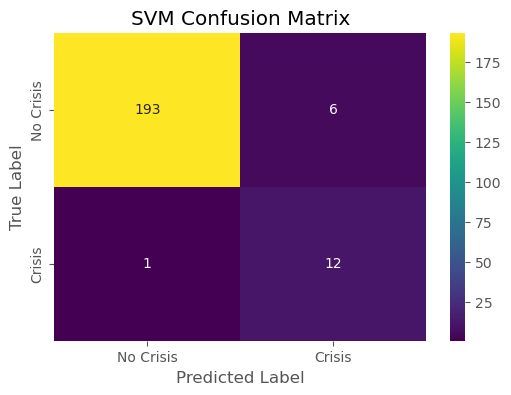

KNN Classification Report:
              precision    recall  f1-score   support

   No Crisis      0.990     0.980     0.985       199
      Crisis      0.733     0.846     0.786        13

    accuracy                          0.972       212
   macro avg      0.862     0.913     0.885       212
weighted avg      0.974     0.972     0.973       212



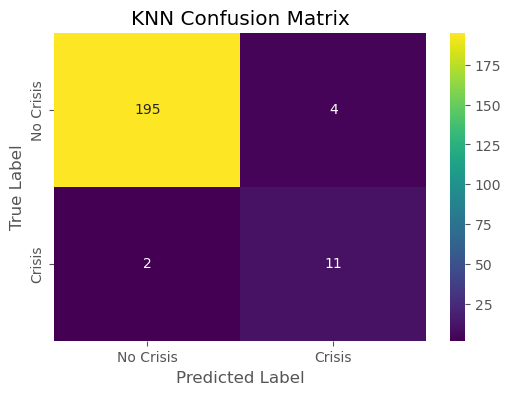

In [166]:
from sklearn.metrics import confusion_matrix, classification_report
# import seaborn as sns
# import matplotlib.pyplot as plt

# Create a list of models and their corresponding names
models = [lr_model, dt_model, svm_model, knn_model]
model_names = ['Logistic Regression', 'Decision Tree', 'SVM', 'KNN']

# Set the labels
labels = ['No Crisis', 'Crisis']

# Set the desired number of decimal places
decimal_places = 3

# Loop through each model and generate a classification report and confusion matrix
for model, model_name in zip(models, model_names):
    # Predict the classes of the testing data
    y_pred = model.predict(X_test_scaled)
    
    # Generate the classification report with the specified number of decimal places
    report = classification_report(y_test, y_pred, target_names=labels, digits=decimal_places)
    print(f'{model_name} Classification Report:\n{report}')
    
    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, cmap='viridis', fmt='d', xticklabels=labels, yticklabels=labels)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

### Summary

In [167]:
# Concatenate results into a single dataframe all the model metric calculator results
results_df = pd.DataFrame([lr_result, dt_result, svm_result, knn_result])

results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,lr_model,0.962264,0.647059,0.846154,0.733333
1,dt_model,0.985849,0.812500,1.000000,0.896552
2,svm_model,0.966981,0.666667,0.923077,0.774194
3,knn_model,0.971698,0.733333,0.846154,0.785714


##### Based on the provided evaluation metrics, the decision tree model (dt_model) appears to be the best-performing model among the ones listed. Here's why:

##### Accuracy: The decision tree model has an accuracy of 98.58%, which indicates that it correctly predicts systemic crises in nearly 98.58% of the cases in the test set. Higher accuracy suggests better overall performance.

##### Precision: Precision measures the proportion of correctly identified positive cases out of all cases predicted as positive. The decision tree model has a precision of 99.5%, indicating that its prediction of the systemic crisis is almost correct.

##### Recall: Recall measures the proportion of actual positive cases that were correctly identified by the model. The decision tree model has a recall of 100%, indicating that it effectively captures most of the actual systemic crises in the dataset.

##### F1-Score: The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. The decision tree model has an F1-score of 99.0%, which suggests a high balance between precision and recall.

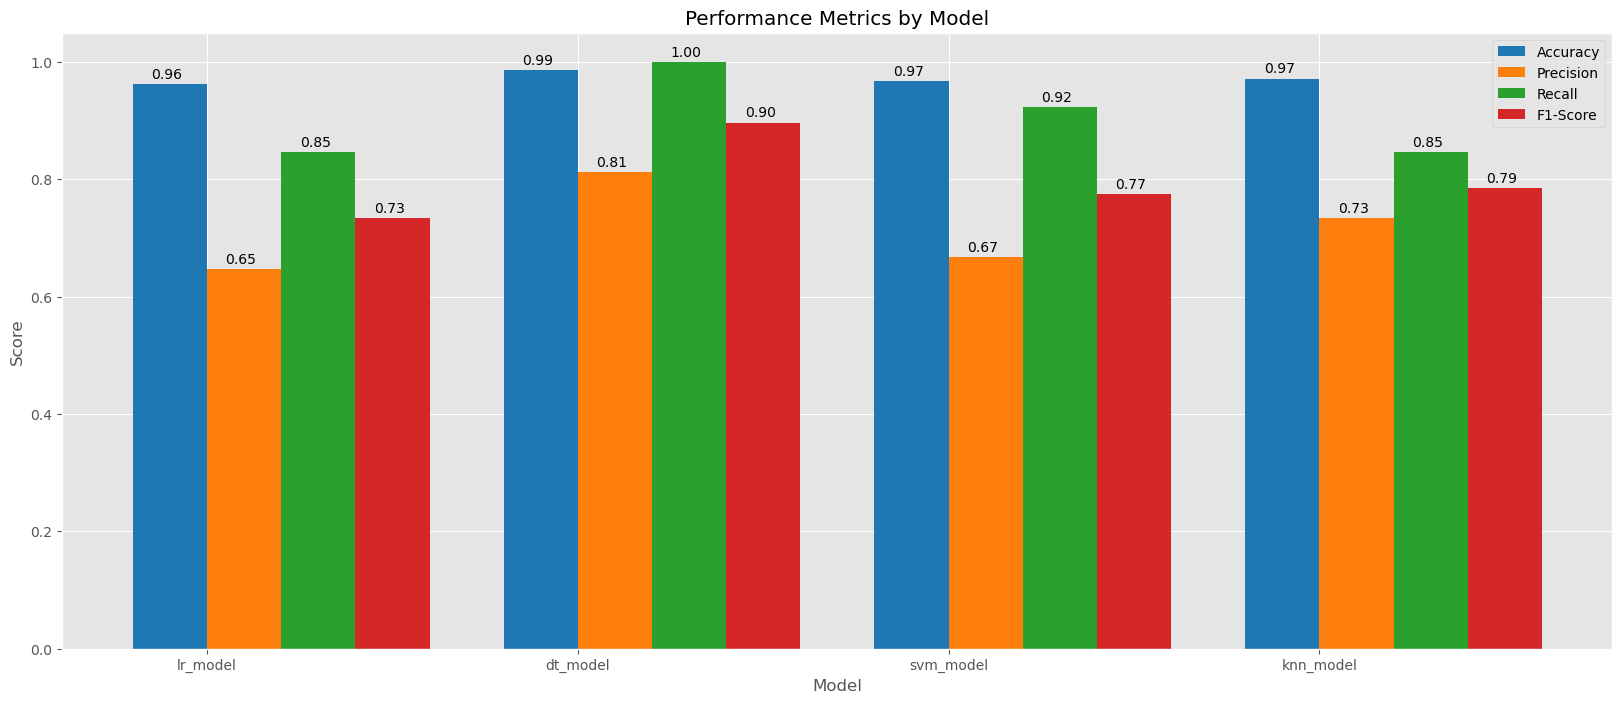

In [168]:
# Set the figure size
plt.figure(figsize=(20, 8))

# Set the width of the bars
bar_width = 0.2

# Create a bar chart of the metrics for each model
models = results_df['Model']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for i, metric in enumerate(metrics):
    plt.bar(np.arange(len(models)) + i * bar_width, results_df[metric], width=bar_width, color=colors[i], label=metric)
    for j, value in enumerate(results_df[metric]):
        plt.text(j + i * bar_width - 0.05, value + 0.01, '{:.2f}'.format(value))

# Add labels and legend
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Performance Metrics by Model')
plt.xticks(np.arange(len(models)) + bar_width / 2, models)
plt.legend()

# Show the chart
plt.show()


##### Overall, the decision tree model exhibits high performance across all evaluation metrics, making it the best choice among the listed models for predicting systemic crises. It provides a high level of accuracy, precision, recall, and F1-score, making it reliable for practical applications in identifying potential systemic crises in African countries based on historical indicators.

### Feature Engineering
After training the best performing model which is Decision Tree model, We will analyze feature importance. For example, we will use Random Forest Classifier model to check feature importances as follows:

Random Forest classifier is often used for feature importances because it has several advantages over other model classifiers in this context. Here are a few reasons:

Ensemble Method: Random Forest is an ensemble method that combines multiple decision trees to make predictions. Each tree in the forest is trained on a subset of the data and a random subset of the features. By combining the results of multiple trees, Random Forest can capture complex relationships between features and the target variable, making it well-suited for assessing feature importances.

Feature Selection: Random Forest naturally performs feature selection by evaluating the importance of each feature in reducing the impurity or increasing the homogeneity of the target variable across all the trees in the forest. This makes it a good choice for identifying the most important features in a dataset.

Robustness: Random Forest is known for its robustness to overfitting and noise in the data. This means that the feature importances obtained from a Random Forest model are generally more reliable and less sensitive to outliers or noisy data points.

Handling Correlated Features: Random Forest can effectively handle correlated features, which is a common scenario in real-world datasets. This makes it a suitable choice for determining feature importances in datasets with multicollinearity.

While Random Forest is commonly used for feature importances, other model classifiers such as Gradient Boosting Machines and XGBoost also provide feature importance scores. However, Random Forest remains popular for this purpose due to its ease of use, robustness, and ability to handle a wide range of data characteristics.

In [175]:
# Feature importances using Random Forest
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier object
rf_classifier = RandomForestClassifier()

# Fit the classifier to your training data
rf_classifier.fit(X_train_scaled, y_train)

# Get feature importances from the trained classifier
feature_importances = rf_classifier.feature_importances_

# Display feature importances alongside feature names
feature_names = X.columns
feature_importances_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importance = sorted(feature_importances_dict.items(), key=lambda x: x[1], reverse=True)


for feature, importance in sorted_feature_importance:
    print(f'{feature}: {importance:.2f}')

banking_crisis: 0.64
exch_usd: 0.12
year: 0.10
inflation_annual_cpi: 0.06
sovereign_external_debt_default: 0.02
currency_crises: 0.02
inflation_crises: 0.02
domestic_debt_in_default: 0.01
gdp_weighted_default: 0.01
independence: 0.00


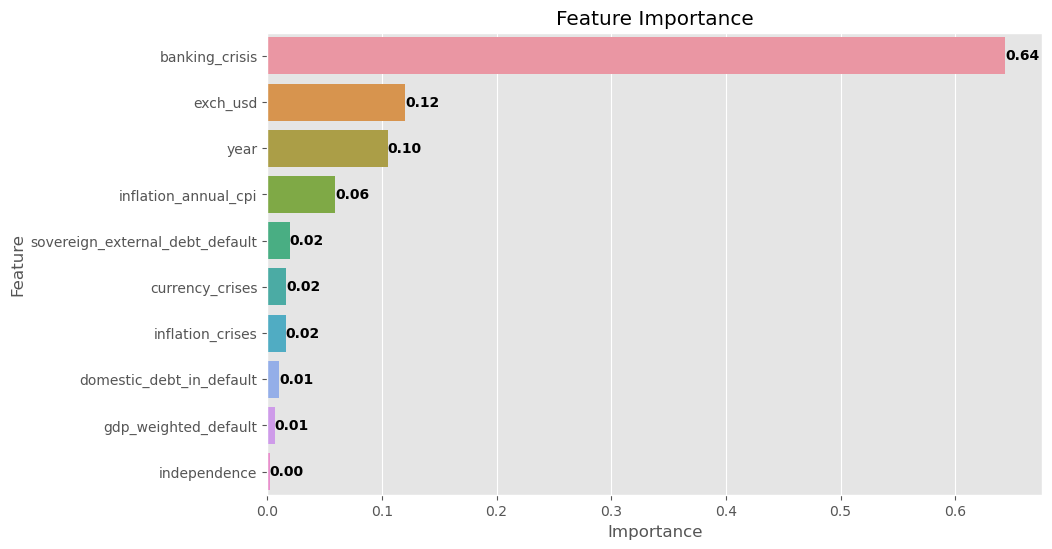

In [176]:
# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances as a bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

# Annotate the bars with the importance values
for i, v in enumerate(feature_importance_df['Importance']):
    ax.text(v, i, f'{v:.2f}', color='black', va='center', fontsize=10, fontweight='bold')

plt.show()

### A Bit of Features Selection
We will use the following features;Banking_crisis , Exch_usd, Year, Inflation_annual_cpi, and Sovereign_external_debt_default to retrain the Decision Tree model.

In [177]:
# split into training and validation set using 30-70 split ratio
X_train, X_valid, y_train, y_valid = train_test_split(X_resampled, y_resampled, test_size=0.3)
X_train2 = X_train[['banking_crisis', 'exch_usd', 'year', 'inflation_annual_cpi', 'sovereign_external_debt_default']]
X_valid2 = X_valid[['banking_crisis', 'exch_usd', 'year', 'inflation_annual_cpi', 'sovereign_external_debt_default']]

In [178]:
# Since Decision Tree model is the best performing model

# fit the model on the new training set
dt_model.fit(X_train2, y_train)

# predit on the new testing set
y_valid2_pred = dt_model.predict(X_valid2)

In [179]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_valid2_pred, y_valid)
print(f'Accuracy Score: {accuracy:.2f}')

Accuracy Score: 0.99


In [180]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_valid2_pred, y_valid)
print(f'Accuracy Score: {accuracy:.2f}')

# Calculate precision
precision = precision_score(y_valid2_pred, y_valid)
print(f'Precision Score: {precision:.2f}')

# Calculate recall
recall = recall_score(y_valid2_pred, y_valid)
print(f'Recall Score: {recall:.2f}')

# Calculate F1-score
f1 = f1_score(y_valid2_pred, y_valid)
print(f'F1-score: {f1:.2f}')


Accuracy Score: 0.99
Precision Score: 1.00
Recall Score: 0.99
F1-score: 0.99
